
# Préparation du TP2
---

Vous allez faire un script `noms_binones_Gpe_A_TP2_1.m` programme qui :
- calcule la convolution de deux signaux ;
- affiche cette convolution

Pour vérifier s'il n'y a pas d'erreurs dans ce programme, vous allez comparer les résultats approchés numériquement par octave **aux calculs que vous aurez faits à l'avance** qui constitueront une **partie du compte-rendu papier à produire**



## Calcul de la convolution (Partie 1 du sujet de TP2)

Vous avez deux signaux dans [TP2 moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24778)
- f(t) est le sinus en valeur absolue qui se ramène à celui vu dans l'exo2 de manière classique [S6 - SdF : Exo 2](../td/S6_series.ipynb#Exercice-2-:) et en passant par Laplace dans [S7 - Sdf Suite : Exo 2 version Laplace](../td/S7_sdf_suite.ipynb#Faire-le-lien-avec-Laplace-(exo-2))  
pour cela il faut trouver la relation entre T0 et alpha.
  - posez-vous à nouveau la question de la période d'un tel signal ! T0 est-elle bien la période ? Faites entuite le lien avec la période trouvée en fonction de alpha   
  - calculez cette série des deux manières vue en TD (calcul direct et par Laplace) et vérifiez le résultat
  - Effectuez les contrôles habituels pour être sûre de votre expression analytique :
    + homogénéité des termes (arguments des exponentielles et sinus sans dimention, c(n) de dimension [V])
    + c(0) doit être la surface algébrique du signal
    + pas de T0 dans l'expression de c(n) (étirement temporel uniquement sur les vecteurs de base)
    + A doit intervenir linéairement : c(n)=A... (étirement d'amplitude uniquement sur les coordonnées de la base)
    + c(n) tend vers 0 quand n tend vers l'infini pour avoir convergence de la série de Fourier.
- g(t), si vous avez suivi les [S9 - TF suite : exo 3e](../td/S9_tf_suite.ipynb#Exercice-3) vous avez la formule des c(n). Bien faire une vérification en faisant le lien comme indiqué avec l'[ex1.3 SdF](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#page=95)



### Consignes sur les scripts

En TP vous calculerez numériquement la valeur des $c(n), a(n), b(n)$ pour quelques valeurs de $n$.  
Ce script devra donner les mêmes valeurs que la formule trouvée analityquement.

> l'avantage est que ce script pourra calculer des SdF dont on n'a pas de résultat analytique car :
> - il n'y a pas de formule connue (primitive inconnue)
> - le signal n'est pas connu mathématiquement (enregistrement de valeurs)
> - on n'a pas le temps ni le talent pour le faire 

Il peut être utile/élégant/lisible de définir **vous-mêmes** les versions numériques des opérateurs :
- **intégrale** d'un vecteur de valeurs `integ = @(signal_de_t, Te) ...` 
- **produit scalaire périodique** entre deux signaux `scalp = @(gauche_de_t, droite_de_t, periode, Te) ...` 
- **Série de Fourier** d'un signal `sdf = @(temps, signal_de_t, periode, Te) ...`

Votre script pourra s'adapter à n'importe quelle fonction. Dans un script **on ne demande jamais à l'utilisatice de rentrer des valeurs pendant l'exécution !** : ce serait pénible voir impossible de demander "quelle est la fonction"...

Comme Matlab/octave est un langage interprété, **l'utilisatrice modifie directement le début du script** puis lance l'exécution.

Ce qui donne un script du type 

```octave
clear all
close all
clc 


%%____________________________________________________________________
%% Configs utilisatrice
% Entrez ici votre fonction f et sa période T0
f = @(t) abs(sin(t)) ;
T0 = 2*pi ;

% Parametrez la période d'échantillonage et la fenêtre d'observation 
Te = 0.1 ;
tmin = -T0 ; 
tmax = T0 ;

%% NE PAS MODIFIER LA SUITE du script
%%____________________________________________________________________


%% Fonctions utiles
integ = @(signal_de_t,Te) sum(signal_de_t)*Te ;

%% Calculs 
t = tmin:Te:tmax ;
f_de_t = f(t) ;

%% Affichage
plot(t,f_de_t)
```

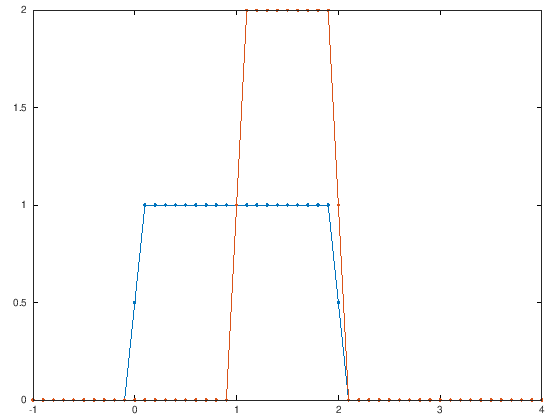

In [45]:
clear all;

eps=0.01;
u = @(t) (t>eps) +0.5*(abs(t)<=eps) ;
porte = @(t,a,b) u(t-a)-u(t-b);
x1 = @(t) porte(t,0,2);
x3 = @(t) 2*porte(t,1,2);

Te=0.1;
t=-1:Te:4;
plot(t,x1(t),'.-',t,x3(t),'.-')

id = 0


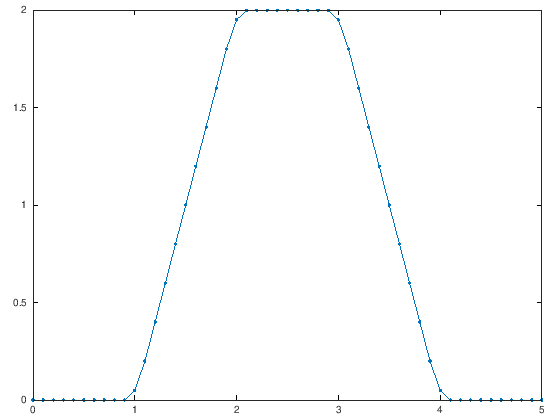

In [54]:
id=0
ttau=0:Te:5;
for tau = ttau
    id +=1;

    tcov(id)=sum(x1(t).*x3(tau-t))*Te;
end
plot(ttau,tcov,'.-')

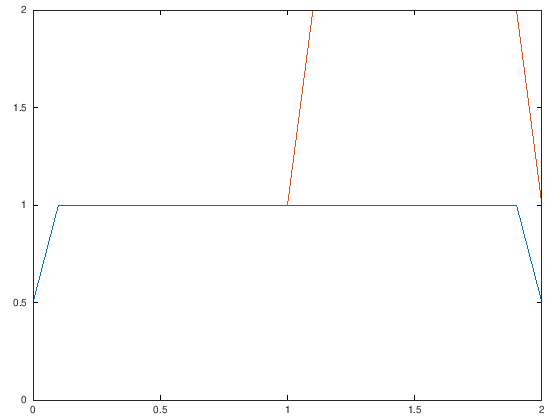

In [55]:
t1m=0;
t1M=2;
t1=t1m:Te:t1M;
tx1=x1(t1);
t3m=1;
t3M=2;
t3=t3m:Te:t3M;
tx3=x3(t3);
plot(t1,tx1,t3,tx3)

error: product: nonconformant arguments (op1 is 1x0, op2 is 1x2)


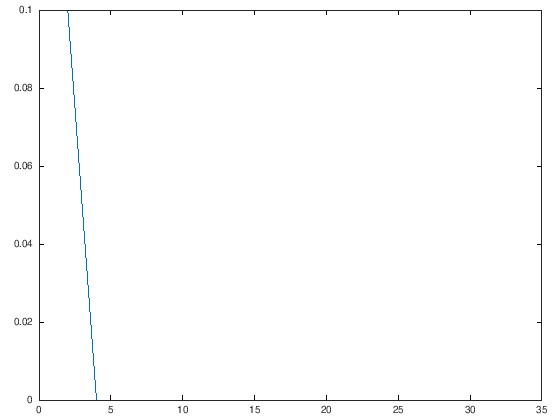

In [58]:
for j=1:(length(t1)+length(t3)-1)
    ttcov(j)= sum(x1(max(1,j-length(x3)):min(length(x1),j)).*x3(max(1,j-length(x1)):-1:min(length(x3),j)))*Te;
end
plot(ttcov)